In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [5]:
data  = pd.read_csv("MarketSegmentation.csv")


Text(0,0.5,'Loyalty')

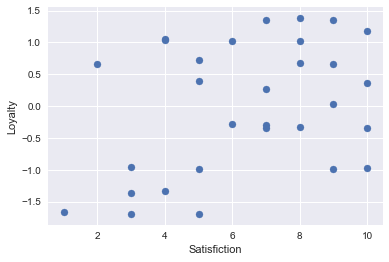

In [6]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel("Satisfiction")
plt.ylabel("Loyalty")

In [7]:
kmeans = KMeans(2)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
identified_cluster = kmeans.fit_predict(data)
identified_cluster

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1])

In [11]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_cluster
data_with_clusters

,Satisfaction,Loyalty,Cluster
0,4,-1.33,1
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


Text(0,0.5,'Loyalty')

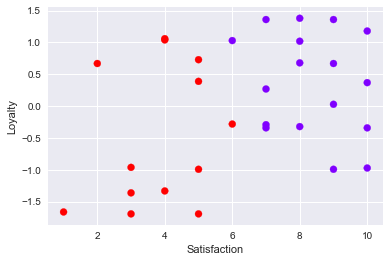

In [12]:
plt.scatter(data_with_clusters['Satisfaction'],data_with_clusters['Loyalty'],c = data_with_clusters["Cluster"],cmap = "rainbow" )
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Standardize the variable

In [19]:
x = data.copy()

In [20]:
from sklearn import preprocessing 
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [23]:
wcss = []
for i in range(1,30):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[59.99999999999999,
 29.818973034723147,
 17.913349527387965,
 10.247181805928424,
 7.792695153937187,
 6.571285077136385,
 5.366082587179451,
 4.352037765292863,
 3.7972682187482847,
 3.2269770028123523,
 2.8137610934059953,
 2.318187547943838,
 2.060956111273019,
 1.8329536048864046,
 1.5174623257082696,
 1.4402329991503724,
 1.263993398062781,
 0.9806547280437273,
 0.8767885783272834,
 0.6924502519033207,
 0.6318014018202026,
 0.4231302751390571,
 0.32271198172750115,
 0.2472105330779867,
 0.17170908442847233,
 0.11383861748989679,
 0.0559681505513213,
 0.0014517677692203244,
 0.00020024383023728806]

Text(0,0.5,'WCSS')

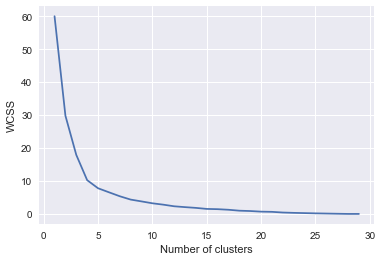

In [25]:
plt.plot(range(1,30),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [29]:
kmeans_new  = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['Cluster_pre'] = kmeans_new.fit_predict(x_scaled)
clusters_new

,Satisfaction,Loyalty,Cluster_pre
0,4,-1.33,2
1,6,-0.28,3
2,5,-0.99,2
3,7,-0.29,3
4,4,1.06,0
5,1,-1.66,2
6,10,-0.97,3
7,8,-0.32,3
8,8,1.02,1
9,8,0.68,1


Text(0,0.5,'Loyalty')

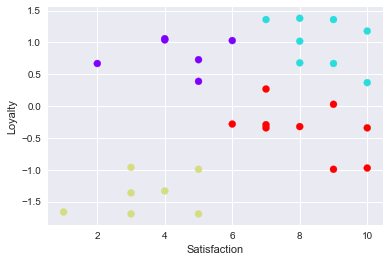

In [30]:
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c = clusters_new['Cluster_pre'],cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')